# **5.2 선형 판별 분석을 통한 지도 방식의 데이터 압축**

**선형 판별 분석(Linear Discriminant Analysis, LDA)**<br>
규제가 없는 모델에서 특성 추출의 기법으로 사용된다.
- 차원의 저주로 인한 과대적합 정도를 줄인다.
- 계산 효율성을 높인다.

<br>

**PCA와 LDA 차이점**
- **PCA**: 데이터셋에 있는 **분산이 최대인 직교 성분 축**을 찾는 것이 목표
- **LDA**: 클래스를 **최적으로 구분할 수 있는 특성 부분 공간**을 찾는 것이 목표

<br>

---

<br>


## **5.2.1 주성분 분석 vs 선형 판별 분석**

PCA와 LDA는 모두 데이터셋의 차원 개수를 줄일 수 있는 **선형 변환 기법**이다.
- **PCA**: 비지도 학습 알고리즘
- **LDA**: 지도 학습 알고리즘

<br>


아래 그림은 **이진 분류 문제**를 위한 LDA 개념의 요약이다.<br>
**클래스 1**의 샘플은 **o**, **클래스 2**의 샘플은 **+**로 표현되어 있다.

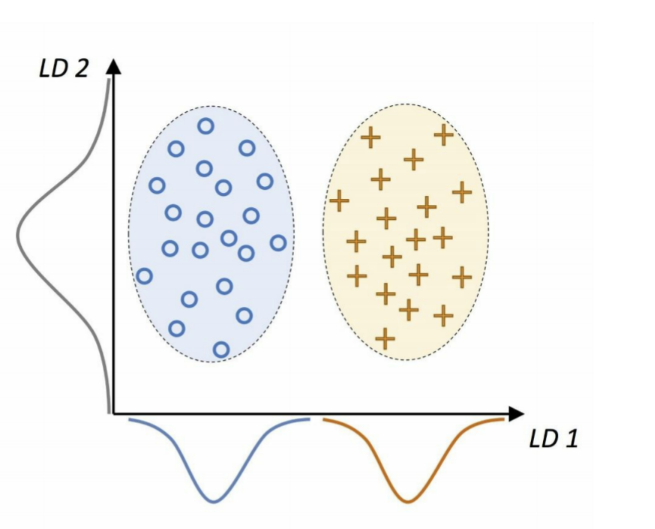



**X축(LD 1)으로 투영하는 선형 판별 벡터**는 두 개의 정규 분포 클래스를 **잘 구분한다.**<br>
**y축(LD 2)으로 투영하는 선형 판별 벡터**는 데이터셋에 있는 분산을 많이 잡아내지만, 클래스 판별 정보가 없기 때문에 **좋은 선형 판별 벡터가 아니다.**

<br>

LDA는 
- 데이터가 **정규 분포라고 가정**한다.
- 클래스가 **동일한 공분산 행렬**을 가지고 훈련 샘플은 서로 **통계적으로 독립적이라고 가정**한다.
- 하나 이상의 **가정이 (조금) 위반되더라도** 차원 축소를 상당히 **잘 수행**한다.

<br>

--- 

<br>


## **5.2.2 선형 판별 분석의 내부 동작 방식**

**LDA 수행에 필요한 주요 단계**
1. d차원의 데이터셋을 **표준화 전처리**한다. *(d는 특성 개수)*
2. 각 클래스에 대해 d차원의 **평균 벡터를 계산**한다. *(클래스 레이블 정보 사용)*
3. 클래스 간의 **산포 행렬(scatter matrix)** S_B와 클래스 내 산포 행렬 S_W를 **구성**한다.
4. S^(-1)_W S_B 행렬의 **고유 벡터와 고윳값을 계산**한다.
5. 고윳값을 **내림차순으로 정렬**하여 고유 벡터의 **순서를 매긴다**.
6. 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 **d×k차원의 변환 행렬 W를 구성**한다. 이 행렬의 열이 고유 벡터이다.
7. 변환 행렬 W를 사용하여 샘플을 **새로운 특성 부분 공간으로 투영**한다.

LDA는 **행렬을 고윳값과 고유 벡터로 분해하여 새로운 저차원 특성 공간을 구성**한다는 점에서 PCA와 닮았다.

<br>

---

<br>


## **5.2.3 산포 행렬 계산**

$$m_i = \frac{1}{n_i} \sum_{x \in D_i} x_m$$




$$m_i = \begin{bmatrix}
\mu_{i, alcohol} \\ 
\mu_{i, malic acid} \\ 
\vdots \\
\mu_{i, proline}
\end{bmatrix} i \in \{1, 2, 3\}$$


$$S_W = \sum^{c}_{i=1} S_i$$


$$S_i = \sum_{x \in D_i}(x-m_i)^T(x-m_i)$$


$${\sum}_{i} = \frac{1}{n_i}S_i = \frac{1}{n_i}\sum_{x \in D_i}(x-m_i)^T(x-m_i)$$


$$S_B = \sum^{c}_{i=1} n_i(m_i-m)^T(m_i-m)$$